By default models use cutoff of 0.50

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('C://Users/syeda/Downloads/pima-indians-diabetes-2.csv',header=0,names=col_names)

In [71]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
X = pima.values[:,:-1]
y = pima.values[:,-1]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=1)

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
y_pred_class = log_reg.predict(X_test)

*`Classification accuracy`*: percentage of correct predictions

In [76]:
from sklearn import metrics

In [77]:
# gives the accuracy of predictions but don't rely if the the underlying classes are not equal
metrics.accuracy_score(y_test,y_pred_class)

0.7760416666666666

### Confusion Matrix
Describes the performance of the classification model.

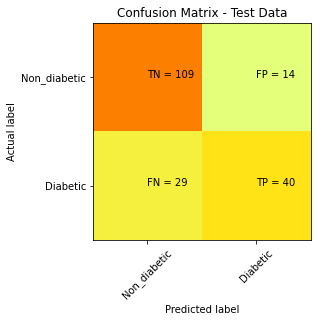

In [78]:
import numpy as np

cm = metrics.confusion_matrix(y_test, y_pred_class)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Model performance measures

In [79]:
TP = 40
TN = 109
FP = 14
FN = 29

`Classification Accuracy`: Overall, how often is the classifier correct?

In [80]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
accuracy

0.7760416666666666

`Classification Error`: Overall, how often is the classifier incorrect?

Also known as `Misclassification Rate`

In [81]:
error = (FP + FN)/(TP + TN + FP + FN)
error

0.22395833333333334

`Sensitivity`: When the actual value is positive, how often is the prediction correct?

Also known as `True Positive Rate` or `Recall`

In [82]:
recall = TP/(TP + FN)
recall

0.5797101449275363

`Specificity`: When the actual value is negative, how often is the prediction correct?

Also known as `True Negative Rate`

In [83]:
specificity = TN/(TN+FP)
specificity

0.8861788617886179

`False Positive Rate`: When the actual value is negative, how often is the prediction incorrect?

In [84]:
fpr = FP/(FP+TN)
fpr

0.11382113821138211

`Precision`: When a positive value is predicted, how often is the prediction correct?

In [85]:
precision = TP/(TP+FP)
precision

0.7407407407407407

### Adjusting the model thresholds

In [86]:
# print the first 10 predicted class with default threshold of .5
# 0 - non-diabetic
# 1 - diabetic
log_reg.predict(X_test)[0:10]
# these all belong to non-diabetic because of higher prob than diabetic

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [87]:
# print the first 10 predicted probabilities of class membership
log_reg.predict_proba(X_test)[0:10]

array([[0.57829335, 0.42170665],
       [0.67672951, 0.32327049],
       [0.8500312 , 0.1499688 ],
       [0.95114129, 0.04885871],
       [0.79045404, 0.20954596],
       [0.71905593, 0.28094407],
       [0.6254732 , 0.3745268 ],
       [0.89729105, 0.10270895],
       [0.84159658, 0.15840342],
       [0.79098512, 0.20901488]])

In [88]:
# print the first 10 predicted probabilities for class 1  (diabetics)
log_reg.predict_proba(X_test)[0:10, 1]

array([0.42170665, 0.32327049, 0.1499688 , 0.04885871, 0.20954596,
       0.28094407, 0.3745268 , 0.10270895, 0.15840342, 0.20901488])

In [89]:
# store the predicted probabilities for diabetic class for all records... 
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

## Reduce the threshold from .5 to .3 to predict the diabetics class. This will make the model sensitive to diabetic class

In [90]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]  # deciding the class of the 1st 10 records based on new threshold

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [91]:
y_pred_prob[0:10]

array([0.42170665, 0.32327049, 0.1499688 , 0.04885871, 0.20954596,
       0.28094407, 0.3745268 , 0.10270895, 0.15840342, 0.20901488])

In [92]:
# with threshold of .5 (default) , the first data point would belong to 0 class i.e. non-diabetic 
y_pred_class[0:10]

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0.])

In [93]:
# previous confusion matrix (default threshold of 0.5)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[90 33]
 [12 57]]


In [94]:
# thus all model performance parameters change

## ROC and AUC for various thresholds

In [95]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob)

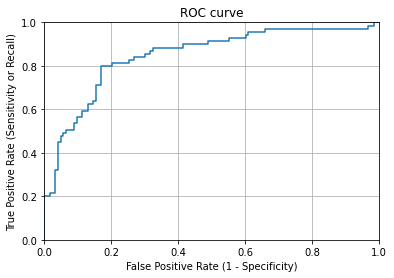

In [96]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity or Recall)')
plt.grid(True)
plt.show()

- ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [97]:
metrics.auc(fpr,tpr) # area under the curve using FPR, TPR

0.8467067279368446

In [98]:
metrics.roc_auc_score(y_test,y_pred_prob) # area under curve using test and predicted

0.8467067279368446

- AUC is useful as a single number summary of classifier performance.
- AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [99]:
thresholds

array([1.98054913, 0.98054913, 0.83857778, 0.77453475, 0.77118387,
       0.76620238, 0.74974041, 0.74066696, 0.69808848, 0.69357709,
       0.68355872, 0.67497356, 0.6697178 , 0.65814639, 0.65642192,
       0.64128787, 0.61697277, 0.61438384, 0.60285693, 0.54992753,
       0.48423073, 0.47032741, 0.45490906, 0.42778018, 0.42419133,
       0.42170665, 0.3779375 , 0.3745268 , 0.34760302, 0.33154974,
       0.32646875, 0.3137206 , 0.3114727 , 0.30781609, 0.29661695,
       0.28889132, 0.28558918, 0.28094407, 0.2770074 , 0.27131923,
       0.26460683, 0.23154113, 0.22839462, 0.20289036, 0.19974429,
       0.15586728, 0.15378985, 0.1469282 , 0.14501713, 0.13936091,
       0.13292855, 0.12160997, 0.12156269, 0.01977313, 0.01748339,
       0.01289764, 0.01273848, 0.00718338])

In [100]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_performance(cut_off):
    print(f'Sensitivity is {tpr[thresholds > cut_off][-1]}')
    print(f'Specificity is {1 - (fpr[thresholds > cut_off][-1])}')

In [101]:
evaluate_performance(0.5)

Sensitivity is 0.5652173913043478
Specificity is 0.8861788617886179


In [102]:
evaluate_performance(0.3)

Sensitivity is 0.8260869565217391
Specificity is 0.7317073170731707
